# Part I: Research Question
## A1: Organization Question
What customer characteristics or combination of customer characteristics from the available churn_clean data best predict customer retention? 

## A2: Goal of Data Analysis
One goal of the data analysis is to reduce the number of features of the dataset. One way to accomplish this is by using feature selection techniques to determine what customer characteristics are similar to each other and dropping one or more from the data set. Another method used is feature extraction and is conducted by combining two or more features into one feature. By reducing the total number of features many benefits are achieved including reduced memory and storage usage and model effiecency. 

# Part II: Method Justification

## B1: Principle Component Analysis 

Principal component analysis(PCA) is a fast and flexible unsupervised method for dimensionality reduction in data. Instead of removing entire features from a data set, and therefor information, PCA aims to combine features into one feature by learning about the relationships between then. PCA calculates vectors of the variances between features and transforms them so that said vectors are the x and y axis and scales the data so that variances are uniform. 

The expected outcome of running PCA on the dataset is an output of n priniciple components. Each principle component contains a feature that explains the variation of the original combined variables included in each principle component. The number of principle components can then be selected based on the total cumulative explained variation desired based on desired model accuracy.   

## B2: Assumption of Principle Component Analysis

 One assumption of PCA is that there is a linear relationship between all variables. The reason for this assumption is that a PCA is based on Pearson correlation coefficients, and as such, there needs to be a linear relationship between the variables. (Laerd Statistics, 2018)



# Part III: Data Preparation

## C1: Continuous Data Variables from Data Set

Below are the 13 continuous variables to be used to answer the proposed question in A1:

- Lat
- Lng
- Population
- Children
- Age
- Income
- Outage_sec_perweek
- Email
- Contacts
- Yearly_equip_failure
- Tenure
- MonthlyCharge
- Bandwidth_GB_Year


In [1]:
#importing Pandas and Numpy
import pandas as pd
import numpy as np

In [2]:
#Importing churn_clean data set
churn_clean = pd.read_csv('C:/Users/holtb/Data/D212_Data_Mining_II/data/churn_clean.csv')

In [3]:
# Dropping unneed variables
churn_clean.drop(['Customer_id','CaseOrder','Interaction','UID'], axis=1, inplace=True)

In [4]:
# Dropping non-continuous variables
non_numeric = ['City', 'State', 'County', 'Zip', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 
               'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',
               'StreamingMovies','PaperlessBilling','PaymentMethod','Item1','Item2',
               'Item3','Item4','Item5','Item6','Item7','Item8']

churn_clean_continuous = churn_clean.drop(non_numeric, axis=1)

In [5]:
print(churn_clean_continuous.shape)

(10000, 13)


In [6]:
print(churn_clean_continuous.describe())

                Lat           Lng     Population    Children           Age  \
count  10000.000000  10000.000000   10000.000000  10000.0000  10000.000000   
mean      38.757567    -90.782536    9756.562400      2.0877     53.078400   
std        5.437389     15.156142   14432.698671      2.1472     20.698882   
min       17.966120   -171.688150       0.000000      0.0000     18.000000   
25%       35.341828    -97.082812     738.000000      0.0000     35.000000   
50%       39.395800    -87.918800    2910.500000      1.0000     53.000000   
75%       42.106908    -80.088745   13168.000000      3.0000     71.000000   
max       70.640660    -65.667850  111850.000000     10.0000     89.000000   

              Income  Outage_sec_perweek         Email      Contacts  \
count   10000.000000        10000.000000  10000.000000  10000.000000   
mean    39806.926771           10.001848     12.016000      0.994200   
std     28199.916702            2.976019      3.025898      0.988466   
min      

## C2: Standardized Continuous Data Set

In [7]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scaling continuous data set and converting back to data frame using original column names

scl_churn_clean_continuous = pd.DataFrame(scaler.fit_transform(churn_clean_continuous), columns= churn_clean_continuous.columns)

scl_churn_clean_continuous.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,3.217410,-2.810432,-0.673405,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,1.024691,0.431644,0.047772,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,1.213570,-2.142079,-0.417238,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,-1.065031,-1.746273,0.284537,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,-1.724710,-0.331512,0.110549,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184


In [8]:
# Exporting scaled DateFrame to CSV
scl_churn_clean_continuous.to_excel('C:/Users/holtb/Data/D212_Data_Mining_II/data/scl_churn_clean_continuous.xlsx')

# Part IV: Analysis

## D1: Matrix of all the principle components

In [56]:
from sklearn.decomposition import PCA
pca = PCA()

pc = pca.fit_transform(scl_churn_clean_continuous)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13'])

pc_df.head(10)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
0,-1.632635,-3.296354,0.578184,2.947064,0.049200,0.236283,-1.239584,0.694516,0.630699,0.126840,0.014701,0.703792,-0.025562
1,-1.678890,-0.663793,-0.165263,-0.587533,-0.864341,1.227328,-1.145874,1.079940,-0.122828,0.062935,-1.462859,0.927392,-0.036908
2,-0.947985,-1.662107,1.500542,1.260078,-0.604303,1.120935,-1.470020,-0.081259,0.009108,0.484669,0.729901,-0.259270,0.060309
3,-0.928918,0.883883,-0.255494,1.343020,-1.897874,0.114564,0.424392,-1.721621,0.296289,-0.700928,0.262978,-1.253845,0.127564
4,-1.889784,1.581549,-0.992000,0.972279,1.138263,-0.503190,-0.011660,-0.813185,1.456770,0.191183,-0.479151,-1.201817,-0.058608
5,-1.445370,1.578838,-1.434795,0.015113,0.859826,0.043549,0.031879,-1.073229,1.230639,1.684685,0.274779,-0.277542,-0.019170
6,-0.995954,0.066221,-1.083756,0.144645,0.893928,0.764213,-1.899456,0.601758,-0.125758,-0.599199,-0.035029,-0.487417,0.108837
7,-1.682875,1.123985,1.616983,0.253361,-0.927824,-1.513094,-0.390062,-0.442926,0.166403,-0.470777,-0.616362,0.081043,0.064701
8,-1.359716,2.204896,0.950179,-0.243474,2.210810,0.441824,-0.105409,-2.030327,3.203556,0.913609,-2.648496,-0.460559,0.081075
9,-1.827003,0.889171,-0.968896,0.248642,0.220555,-1.578919,0.162032,0.149250,1.662681,-0.503430,0.393250,0.637253,-0.045272


## D2: Total Number of Principle Components Using Elbow Rule

In [17]:
print(len(pca.components_))

var = pca.explained_variance_ratio_


13


Text(0, 0.5, 'Explained variance ratio')

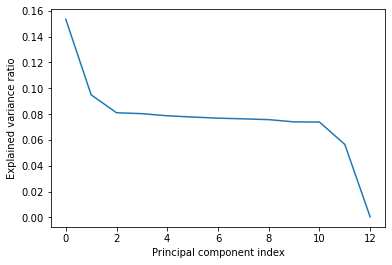

In [18]:
import matplotlib.pyplot as plt

plt.plot(var)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')

In [57]:
# PCA fit with the last 2 principle components removed
pca =PCA(n_components=11)

pc = pca.fit_transform(scl_churn_clean_continuous)
pc_df = pd.DataFrame(pc, columns=['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10', 'PC_11'])

pc_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11
0,-1.632635,-3.296354,0.578184,2.947064,0.049200,0.236283,-1.239584,0.694516,0.630699,0.126840,0.014701
1,-1.678890,-0.663793,-0.165263,-0.587533,-0.864341,1.227328,-1.145874,1.079940,-0.122828,0.062935,-1.462859
2,-0.947985,-1.662107,1.500542,1.260078,-0.604303,1.120935,-1.470020,-0.081259,0.009108,0.484669,0.729901
3,-0.928918,0.883883,-0.255494,1.343020,-1.897874,0.114564,0.424392,-1.721621,0.296289,-0.700928,0.262978
4,-1.889784,1.581549,-0.992000,0.972279,1.138263,-0.503190,-0.011660,-0.813185,1.456770,0.191183,-0.479151


## D3: Variance of Each Principle Component

In [38]:
print(pca.explained_variance_)

[1.99490495 1.23415146 1.05376978 1.04469451 1.02328808 1.01078182
 0.99930258 0.99267518 0.98453106 0.9618864  0.96049531]


In [39]:
print(pca.explained_variance_ratio_)

[0.15343888 0.09492523 0.08105111 0.08035308 0.0787066  0.07774467
 0.07686174 0.07635199 0.07572558 0.07398386 0.07387687]


## D4: Total Variance

In [40]:
print(pca.explained_variance_.cumsum())

[ 1.99490495  3.22905642  4.28282619  5.3275207   6.35080878  7.3615906
  8.36089318  9.35356836 10.33809941 11.29998582 12.26048113]


In [41]:
print(pca.explained_variance_ratio_.cumsum())

[0.15343888 0.24836412 0.32941522 0.4097683  0.4884749  0.56621957
 0.64308131 0.71943331 0.79515889 0.86914276 0.94301962]


## D5: Summarize Results

Using ```sklearn```'s PCA method the standardized data set was fit and transformed. The explained_variance_ratio_ feature of the PCA was plotted against the indexed principle components (PC) to create the scree plot. After analyzing the scree plot it was difficult to determine an elbow in the plot. This was due to the fact that most of the PCs expained around 7-9% variance for each one. The exceptions were PC1, explaining ~15% of variance and PC 13 explaining almost 0% of the variance. The final PC was conducted with only 2 PC's removed, however, during model fitting, futher experimentation with PC removal is needed to produce the most effiecent model. 

Each PC can be explored by looking at the effects of each variable on the PC from the table created before. For simplicity the first and second PC are explored. For PC_1 it can be determined that 'Tenure' and 'Bandwidth_GB_Year' have the greatest effect in the principle component as they their relationship is very strong. Having studied the data previously it is known that both of these variables have a strong linear relationship. For the second principle component, 'Population', 'Lng' and 'Email' have a moderate relationship in the data. This is most likely caused because the geographic locations in the data set are skewed because many of the data points are located much further 'east' (continental US) compared to another portion of the dataset. (Alaska & Hawaii)


In [24]:
vectors = pca.components_.round(2)

In [55]:
# Create dictionary of column names to PC components
PC_1_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[0]))
PC_2_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[1]))
PC_3_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[2]))
PC_4_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[3]))
PC_5_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[4]))
PC_6_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[5]))
PC_7_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[6]))
PC_8_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[7]))
PC_9_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[8]))
PC_10_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[9]))
PC_11_effects = dict(zip(scl_churn_clean_continuous.columns, vectors[10]))

In [54]:
# Create summary data frame of PC effects
PC_effects = pd.DataFrame([PC_1_effects, PC_2_effects, PC_3_effects, PC_4_effects, PC_5_effects, PC_6_effects, PC_7_effects, PC_8_effects,
              PC_9_effects, PC_10_effects, PC_11_effects], index= ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6','PC_7', 'PC_8', 'PC_9', 'PC_10', 'PC_11'])
PC_effects

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
PC_1,-0.02,0.01,-0.00,0.01,0.00,0.00,0.01,-0.02,0.00,0.02,0.71,0.04,0.71
PC_2,-0.71,0.18,0.65,-0.01,0.05,-0.05,0.01,0.15,0.03,-0.01,-0.01,-0.00,-0.01
PC_3,-0.03,-0.29,0.15,0.45,-0.44,0.20,-0.25,-0.09,-0.45,0.15,0.01,-0.40,0.01
PC_4,0.11,-0.74,0.32,-0.46,0.23,-0.04,-0.13,-0.14,0.11,0.06,0.03,-0.14,-0.00
PC_5,-0.09,0.34,-0.12,-0.11,0.44,0.31,-0.46,-0.35,0.01,0.42,0.01,-0.22,-0.02
PC_6,-0.03,-0.09,0.10,0.13,-0.10,0.10,0.60,-0.40,0.08,0.59,-0.04,0.26,-0.01
PC_7,-0.01,-0.05,0.05,0.03,-0.19,0.77,0.05,0.00,0.52,-0.29,-0.00,-0.04,0.00
PC_8,-0.02,-0.09,0.08,-0.07,0.09,0.34,-0.18,-0.13,-0.51,-0.19,-0.04,0.71,0.00
PC_9,0.09,-0.17,-0.03,0.19,0.34,0.25,0.06,0.76,-0.05,0.40,0.00,0.06,0.00
PC_10,0.02,-0.15,0.06,0.44,-0.08,-0.28,-0.52,-0.05,0.49,0.14,-0.04,0.41,0.01


# Part V: Attachments

## Code Sources

Boeye, J. "Dimensionality Reduction in Python" [MOOC]. Datacamp. https://app.datacamp.com/learn/courses/dimensionality-reduction-in-python

Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 0.1038/s41586-020-2649-2. (Publisher link).

J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Python Software Foundation. Python Language Reference, version 3.7. Available at http://www.python.org

## In-text Citations

Laerd Statistics. (2018). Principal Components Analysis (PCA) using SPSS Statistics. Retrieved January 02, 2022, from https://statistics.laerd.com/spss-tutorials/principal-components-analysis-pca-using-spss-statistics.php
